**Plan**<br>
**1. Introduction to GANs**<br>
**2. Architecture of GANs**<br>
**3. Applications**<br>
**4. Conclusion**


# **Introduction to GANs**

**<h2>What are GANs?</h2>**
Generative Adversarial Networks (GANs) represent a revolutionary approach in the field of artificial intelligence and machine learning, specifically within the domain of generative models. Introduced by Ian Goodfellow and his colleagues in 2014, GANs have transformed our ability to generate new, synthetic data that is strikingly similar to real-world data. These networks have found applications in various fields, including image and video generation, music creation, and even in generating realistic text.

**<h2>How do GANs work?</h2>**

At the core of a GAN are two neural networks: the **Generator** and the **Discriminator**. These networks engage in a continuous game, where the Generator strives to create data that is indistinguishable from real data, while the Discriminator attempts to distinguish between real and synthetic data. This adversarial process can be summarized as follows:

**1. Generator (G): Takes random noise as input and generates data (e.g., images).**<br>
**2. Discriminator (D): Takes both real and generated data as input and attempts to classify them correctly.**

Through this process of adversarial training, both networks improve: the Generator becomes better at creating realistic data, and the Discriminator becomes better at detecting synthetic data.

**<h2>Key Components of GANs</h2>**

**1. Noise Vector:** The input to the Generator, typically a random vector, which it transforms into a synthetic data sample.<br>
**2. Generated Data:** The output from the Generator, intended to mimic real data.<br>
**3. Real Data:** Actual data samples from the training set, used to train the Discriminator.<br>
**4. Discriminator Output:** The binary classification (real or fake) for each input data sample.

**<h2>The training process</h2>**

Training a GAN involves a two-step iterative process:

**1. Train the Discriminator:** Update the Discriminator's weights to improve its ability to distinguish real data from fake data generated by the Generator.<br>
**2. Train the Generator:** Update the Generator's weights to improve its ability to produce data that the Discriminator cannot easily distinguish from real data.

This adversarial training leads to a dynamic and powerful generative model capable of producing highly realistic data.

**<h2>Applications of GANs</h2>**

GANs have shown incredible potential across various applications:

* Image Generation: Creating high-resolution and realistic images from textual descriptions or other images.
* Video Synthesis: Generating video frames to create realistic animations or predict future frames in a sequence.
* Data Augmentation: Expanding datasets in medical imaging, autonomous driving, and other fields to improve model training.
* Creative Arts: Generating music, art, and other creative content.

# **Architecture of GANs**

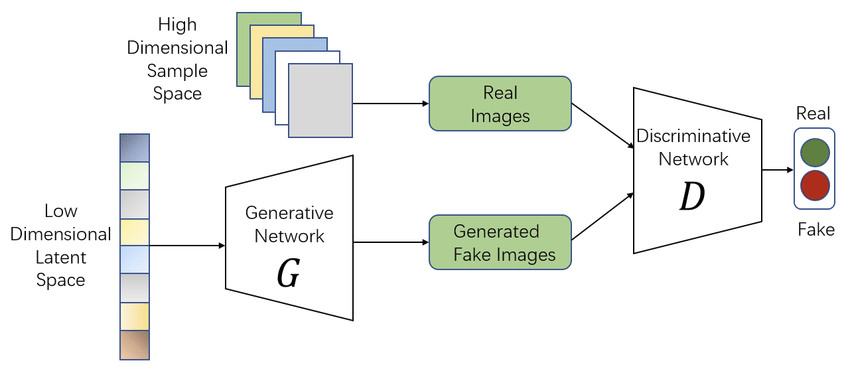

Over the years, numerous variations of the basic Generative Adversarial Network (GAN) architecture have been proposed to enhance performance, address challenges, and expand applicability. These variants are designed to improve the stability of training, the quality of generated data, and the versatility of GANs in different applications. In this section, we will explore some of the most significant variations:<br>
* DCGAN
* CGAN
* WGAN
* CycleGAN

**<h2>DCGAN (Deep Convolutional GAN)</h2>**

Deep Convolutional GANs (DCGANs) are an extension of the original GAN framework, introduced by Radford, Metz, and Chintala in 2015. DCGANs leverage deep convolutional neural networks (CNNs) to generate high-quality images, addressing some of the limitations of fully connected networks used in the original GANs.

**Key Features:**

* Convolutional Layers: Replace fully connected layers with convolutional layers in both the Generator and Discriminator, enabling the model to capture spatial hierarchies in image data.
* Transposed Convolutions: Use transposed convolutional layers (also known as deconvolutional layers) in the Generator to upsample the input noise vector into an image.
* Batch Normalization: Apply batch normalization to stabilize training and accelerate convergence.
* Activation Functions: Use ReLU activation in the Generator (except for the output layer, which uses tanh) and Leaky ReLU in the Discriminator.

**Applications:**

* High-resolution image generation
* Image super-resolution
* Unsupervised representation learning

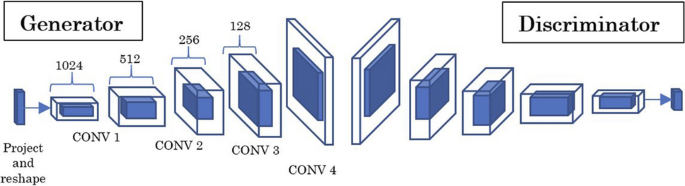

**<h2>CGAN (Conditional GAN)</h2>**

Conditional GANs (CGANs) were introduced by Mirza and Osindero in 2014. CGANs incorporate additional information (conditions) into the GAN framework, allowing for the generation of data conditioned on specific attributes.

**Key Features:**

* Conditional Information: Both the Generator and Discriminator receive additional information (e.g., class labels or data attributes) as input. This information is typically concatenated with the noise vector for the Generator and with the input data for the Discriminator.
* Conditional Loss: The loss functions for both the Generator and Discriminator are modified to incorporate the conditional information, guiding the model to generate data that meets the specified conditions.

**Applications:**

* Class-conditional image generation
* Data augmentation for supervised learning
* Text-to-image synthesis

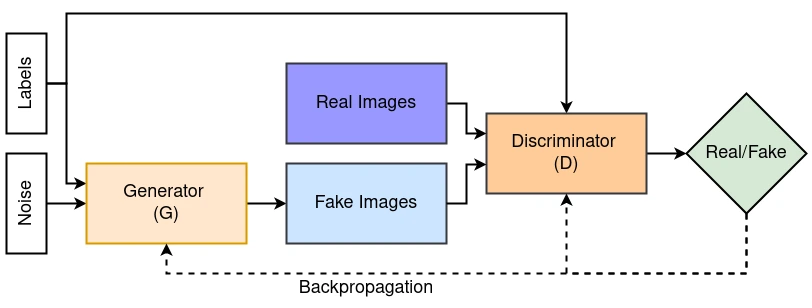

**<h2>WGAN (Wasserstein GAN)</h2>**

Wasserstein GANs (WGANs) were proposed by Arjovsky, Chintala, and Bottou in 2017 to address the training instability and mode collapse issues commonly encountered in GANs. WGANs introduce the Wasserstein distance (also known as Earth Mover's distance) as a new loss metric.

**Key Features:**

* Wasserstein Loss: Replaces the binary cross-entropy loss with the Wasserstein loss, providing a more meaningful gradient for the Generator to improve.
* Lipschitz Continuity: Enforces Lipschitz continuity on the Discriminator by clipping the weights within a specified range or by using gradient penalty (WGAN-GP).
* Improved Training Stability: The Wasserstein loss helps to stabilize training and provides better convergence properties compared to the original GAN loss.

**Applications:**

* Stable training of GANs for high-quality image generation
* Addressing mode collapse in generative models
* Improved training dynamics for large-scale GANs

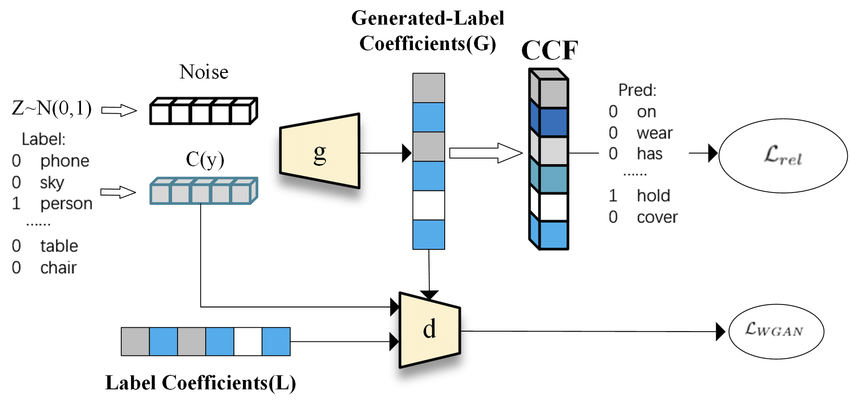

---
**Binary Cross-Entropy Loss (Original GANs)**

The binary cross-entropy loss is used in the original GAN framework. It relies on the concept of probability and measures the difference between the predicted probabilities and the actual labels.

**Discriminator Loss:**
$$ \mathcal{L}_D = -\left( \mathbb{E}_{x \sim p_{data}(x)} [\log D(x)] + \mathbb{E}_{z \sim p_z(z)} [\log (1 - D(G(z)))] \right) $$

- **Real Data**: $ \log D(x) $ - The Discriminator tries to maximize this term to correctly classify real data.
- **Generated Data**: $ \log (1 - D(G(z))) $ - The Discriminator tries to maximize this term to correctly classify generated (fake) data.

**Generator Loss:**
$$ \mathcal{L}_G = -\mathbb{E}_{z \sim p_z(z)} [\log D(G(z))] $$

- The Generator tries to minimize $ \log (1 - D(G(z))) $, but equivalently, in practice, it maximizes $ \log D(G(z)) $ to fool the Discriminator into thinking generated data is real.

**Wasserstein Loss (WGAN)**

The Wasserstein loss is based on the Wasserstein distance (Earth Mover's distance), which measures the distance between two probability distributions. It provides more stable gradients and aims to solve issues like mode collapse and vanishing gradients present in the original GAN.

**Critic (Discriminator) Loss:**
$$ \mathcal{L}_D = -\left( \mathbb{E}_{x \sim p_{data}(x)} [D(x)] - \mathbb{E}_{z \sim p_z(z)} [D(G(z))] \right) $$

- **Real Data**: $ D(x) $ - The Critic assigns high scores to real data.
- **Generated Data**: $ D(G(z)) $ - The Critic assigns low scores to generated data.
- The Critic's objective is to maximize the difference between the scores of real data and generated data.

**Generator Loss:**
$$ \mathcal{L}_G = -\mathbb{E}_{z \sim p_z(z)} [D(G(z))] $$

- The Generator's objective is to maximize the score assigned to generated data by the Critic, effectively minimizing the distance between the distributions of real and generated data.

**Key Differences:**

1. **Objective**:
   - **Binary Cross-Entropy Loss**: Based on probabilistic classification and measures the performance using probabilities and log likelihoods.
   - **Wasserstein Loss**: Based on optimal transport theory and measures the distance between the distributions of real and generated data.

2. **Gradient Behavior**:
   - **Binary Cross-Entropy Loss**: Can suffer from vanishing gradients when the Discriminator becomes too strong, making it hard for the Generator to learn.
   - **Wasserstein Loss**: Provides more meaningful and smooth gradients, improving the stability and convergence of the training process.

3. **Discriminator vs. Critic**:
   - **Binary Cross-Entropy Loss**: The Discriminator outputs probabilities (0 to 1) indicating the likelihood that a sample is real.
   - **Wasserstein Loss**: The Critic outputs real-valued scores without being constrained to the [0, 1] range, representing how real or fake a sample is.

4. **Training Dynamics**:
   - **Binary Cross-Entropy Loss**: The Generator and Discriminator play a minimax game, which can lead to instability and mode collapse.
   - **Wasserstein Loss**: The training is formulated as an optimization problem for approximating the Wasserstein distance, leading to more stable and reliable training dynamics.

---

**<H2>CycleGAN</H2>**

CycleGANs were introduced by Zhu et al. in 2017 for image-to-image translation tasks without requiring paired training examples. CycleGANs enable the transformation of images from one domain to another while preserving the core content.

**Key Features:**

* Cycle Consistency Loss: Enforces that translating an image to the target domain and then back to the original domain should result in the original image, ensuring consistency.
* Unpaired Training Data: Does not require paired examples; instead, it uses unpaired data from the source and target domains.
* Dual Generators and Discriminators: Utilizes two Generators (one for each domain) and two Discriminators to distinguish real from translated images in both domains.

**Applications:**

* Style transfer (e.g., converting photos to paintings)
* Domain adaptation (e.g., day-to-night image translation)
* Image restoration (e.g., colorization of black-and-white images)

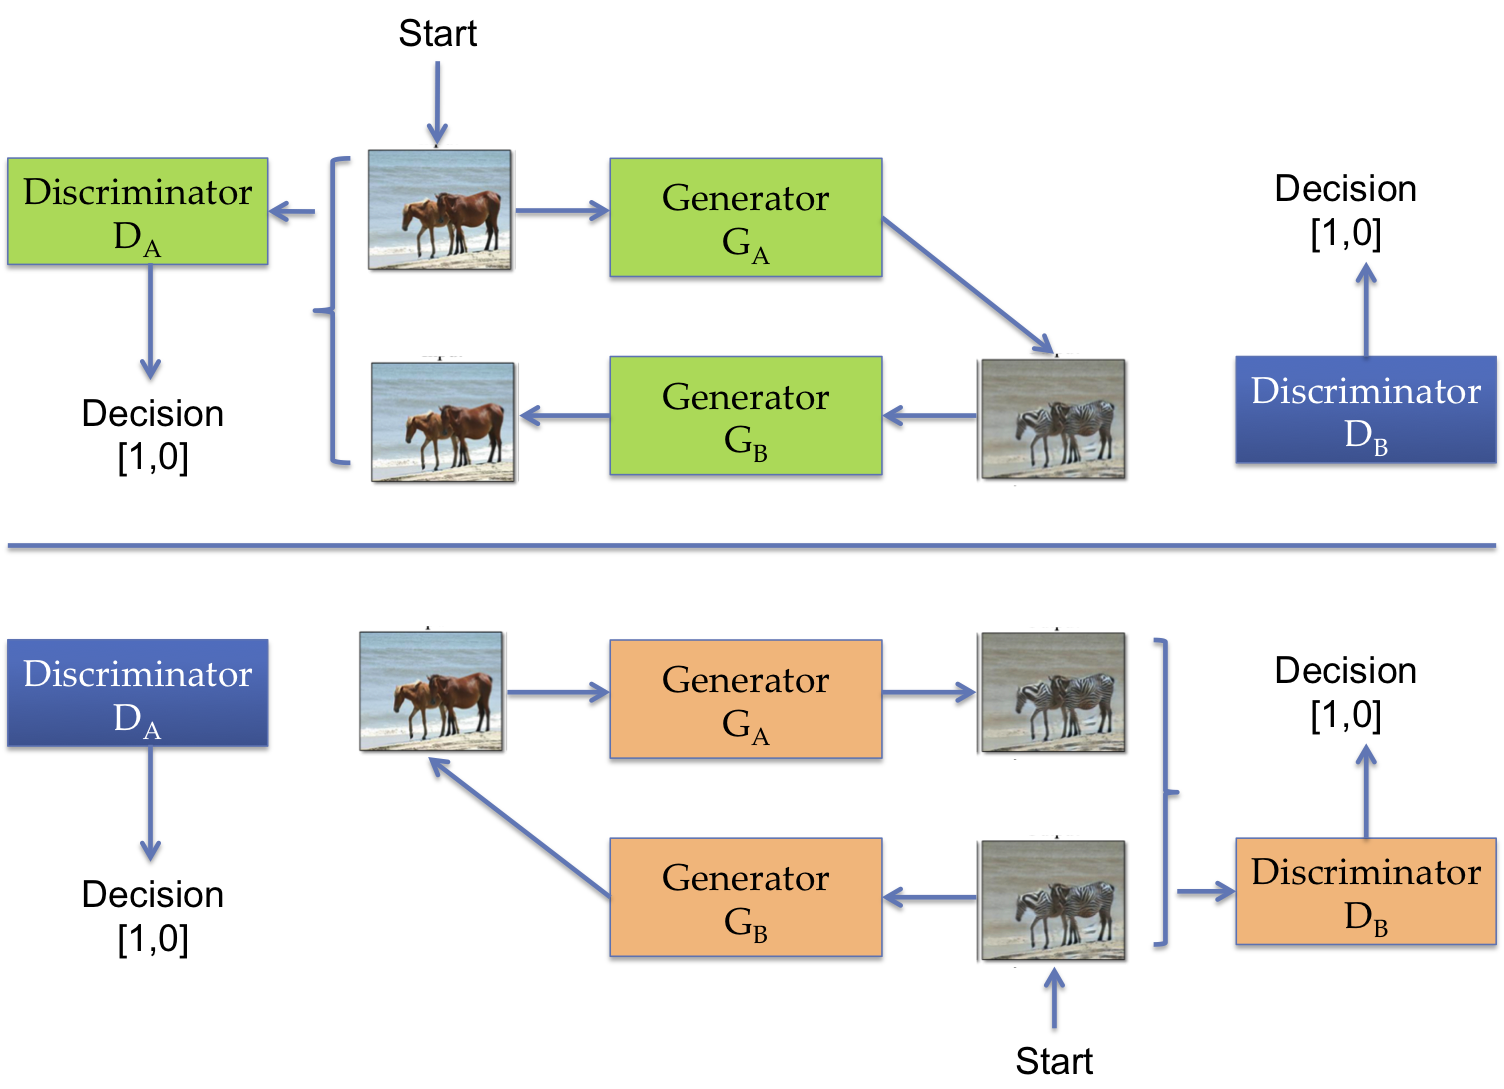

# **Applications**

## **GAN standard example (MNIST)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [2]:
# Define the Generator
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(784, activation='tanh'))
    return model

In [3]:
# Define the Discriminator
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Dense(512, input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [10]:
# Define the GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [5]:
# Function to save generated images
def save_imgs(epoch, generator, latent_dim, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()

In [11]:
# Train the GAN
def train_gan(epochs, batch_size, latent_dim):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0  # Normalize to [-1, 1]
    X_train = X_train.reshape(-1, 784)  # Flatten the images
    img_shape = (784,)
    bat_per_epo = int(X_train.shape[0] / batch_size)

    # Build and compile the discriminator
    discriminator = build_discriminator(img_shape)
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

    # Build the generator
    generator = build_generator(latent_dim)


    # Build and compile the GAN
    gan = build_gan(generator, discriminator)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    # Training loop
    for epoch in range(epochs):
        for j in range(bat_per_epo):
            # ---------------------
            # Train Discriminator
            # ---------------------

            # Select a random batch of real images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_imgs = X_train[idx]

            # Generate a batch of fake images
            z = np.random.normal(0, 1, (batch_size, latent_dim))
            fake_imgs = generator.predict(z, verbose=0)

            # Labels for real and fake images
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator
            d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            # Train Generator
            # ---------------------

            # Generate new noise
            z = np.random.normal(0, 1, (batch_size, latent_dim))

            # Labels for generated images (pretend they are real)
            valid_labels = np.ones((batch_size, 1))

            # Train the generator (through the combined model)
            g_loss = gan.train_on_batch(z, valid_labels)

        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")

        # Print the progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")
            save_imgs(epoch, generator, latent_dim)

In [ ]:
if __name__ == '__main__':
    latent_dim = 100
    epochs = 10000
    batch_size = 64
    train_gan(epochs, batch_size, latent_dim)

## **DCGAN (CIFAR-10)**

### **First method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Conv2D, Conv2DTranspose, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

In [ ]:
# Define the Generator
def build_generator(latent_dim):
    model = Sequential()

    model.add(Dense(8*8*256, use_bias=False, input_shape=(latent_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Reshape((8, 8, 256)))

    model.add(Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))

    return model

In [ ]:
# Define the Discriminator
def build_discriminator(img_shape):
    model = Sequential()

    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
# Define the GAN
def build_gan(generator, discriminator):
    model = Sequential()
    discriminator.trainable = False
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
# Function to save generated images
def save_imgs(epoch, generator, latent_dim, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale images 0 - 1
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"dcgan_generated_image_epoch_{epoch}.png")
    plt.close()

In [ ]:
# Train the GAN
def train_gan(epochs, batch_size, latent_dim):
    (X_train, _), (_, _) = cifar10.load_data()
    X_train = (X_train - 127.5) / 127.5  # Normalize to [-1, 1]
    img_shape = (32, 32, 3)
    bat_per_epo = int(X_train.shape[0] / batch_size)

    # Build and compile the discriminator
    discriminator = build_discriminator(img_shape)
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

    # Build the generator
    generator = build_generator(latent_dim)

    # Build and compile the GAN
    gan = build_gan(generator, discriminator)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    # Training loop
    for epoch in range(epochs):
        for _ in range(bat_per_epo):
            # ---------------------
            # Train Discriminator
            # ---------------------

            # Select a random batch of real images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_imgs = X_train[idx]

            # Generate a batch of fake images
            z = np.random.normal(0, 1, (batch_size, latent_dim))
            fake_imgs = generator.predict(z, verbose=0)

            # Labels for real and fake images
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator
            d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            # Train Generator
            # ---------------------

            # Generate new noise
            z = np.random.normal(0, 1, (batch_size, latent_dim))

            # Labels for generated images (pretend they are real)
            valid_labels = np.ones((batch_size, 1))

            # Train the generator (through the combined model)
            g_loss = gan.train_on_batch(z, valid_labels)

        # Print the progress
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")

        # Save generated images at certain intervals
        if epoch % 1000 == 0:
            save_imgs(epoch, generator, latent_dim)


In [ ]:
if __name__ == '__main__':
    latent_dim = 100
    epochs = 10000
    batch_size = 64
    train_gan(epochs, batch_size, latent_dim)

### **Second method**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, UpSampling2D, Layer, InputSpec
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam


In [ ]:
def build_generator(latent_dim, channels=3):
    model = Sequential(name='Generator')

    model.add(Dense(4 * 4 * 256, input_dim=latent_dim))
    model.add(Reshape((4, 4, 256)))

    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(channels, (4, 4), activation='tanh', strides=(2, 2), padding='same'))

    return model

In [ ]:
def build_discriminator(input_shape=(64, 64, 3)):
    model = Sequential(name='Discriminator')

    model.add(Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
class StyleGAN(Model):
    def __init__(self, generator, discriminator, latent_dim):
        super(StyleGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(StyleGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, images):
        batch_size = tf.shape(images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Generate images
        generated_images = self.generator(random_latent_vectors)

        # Train discriminator
        with tf.GradientTape() as tape:
            real_output = self.discriminator(images, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            d_loss = self.loss_fn(tf.ones_like(real_output), real_output) + self.loss_fn(tf.zeros_like(fake_output), fake_output)
        d_grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(d_grads, self.discriminator.trainable_variables))

        # Train generator
        with tf.GradientTape() as tape:
            fake_output = self.discriminator(generated_images, training=True)
            g_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)
        g_grads = tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(g_grads, self.generator.trainable_variables))

        return {'d_loss': d_loss, 'g_loss': g_loss}

In [ ]:
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()
style_gan = StyleGAN(generator=generator, discriminator=discriminator, latent_dim=latent_dim)

g_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
d_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

style_gan.compile(g_optimizer=g_optimizer, d_optimizer=d_optimizer, loss_fn=loss_fn)

# Load and preprocess dataset (for example, CIFAR-10)
(x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 127.5 - 1.
x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)

# Train the StyleGAN
style_gan.fit(x_train, batch_size=64, epochs=100, verbose=1)

## **CGAN (MNIST)**

In [ ]:
import keras

from keras import layers
from keras import ops
from tensorflow_docs.vis import embed
import tensorflow as tf
import numpy as np
import imageio

In [ ]:
batch_size = 64
num_channels = 1
num_classes = 10
image_size = 28
latent_dim = 128

In [ ]:
# We'll use all the available examples from both the training and test
# sets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
all_labels = keras.utils.to_categorical(all_labels, 10)

# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((all_digits, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training images: {all_digits.shape}")
print(f"Shape of training labels: {all_labels.shape}")

In [ ]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)
# 138 11

In [ ]:


# Create the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer((28, 28, discriminator_in_channels)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # We want to generate 128 + num_classes coefficients to reshape into a
        # 7x7x(128 + num_classes) map.
        layers.Dense(7 * 7 * generator_in_channels),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Reshape((7, 7, generator_in_channels)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [ ]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_images, one_hot_labels = data

        # Add dummy dimensions to the labels so that they can be concatenated with
        # the images. This is for the discriminator.
        image_one_hot_labels = one_hot_labels[:, :, None, None]
        image_one_hot_labels = ops.repeat(
            image_one_hot_labels, repeats=[image_size * image_size]
        )
        image_one_hot_labels = ops.reshape(
            image_one_hot_labels, (-1, image_size, image_size, num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake images.
        generated_images = self.generator(random_vector_labels)

        # Combine them with real images. Note that we are concatenating the labels
        # with these images here.
        fake_image_and_labels = ops.concatenate(
            [generated_images, image_one_hot_labels], -1
        )
        real_image_and_labels = ops.concatenate([real_images, image_one_hot_labels], -1)
        combined_images = ops.concatenate(
            [fake_image_and_labels, real_image_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake images.
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real images".
        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_vector_labels)
            fake_image_and_labels = ops.concatenate(
                [fake_images, image_one_hot_labels], -1
            )
            predictions = self.discriminator(fake_image_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }


In [ ]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

cond_gan.fit(dataset, epochs=20)

In [ ]:
# We first extract the trained generator from our Conditional GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate images that would be generated in
# between the interpolation + 2 (start and last images).
num_interpolation = 9  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = keras.random.normal(shape=(1, latent_dim))
interpolation_noise = ops.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = ops.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(first_number, second_number):
    # Convert the start and end labels to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([first_number], num_classes)
    second_label = keras.utils.to_categorical([second_number], num_classes)
    first_label = ops.cast(first_label, "float32")
    second_label = ops.cast(second_label, "float32")

    # Calculate the interpolation vector between the two labels.
    percent_second_label = ops.linspace(0, 1, num_interpolation)[:, None]
    percent_second_label = ops.cast(percent_second_label, "float32")
    interpolation_labels = (
        first_label * (1 - percent_second_label) + second_label * percent_second_label
    )

    # Combine the noise and the labels and run inference with the generator.
    noise_and_labels = ops.concatenate([interpolation_noise, interpolation_labels], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


start_class = 2  # @param {type:"slider", min:0, max:9, step:1}
end_class = 6  # @param {type:"slider", min:0, max:9, step:1}

fake_images = interpolate_class(start_class, end_class)


In [ ]:
fake_images *= 255.0
converted_images = fake_images.astype(np.uint8)
converted_images = ops.image.resize(converted_images, (96, 96)).numpy().astype(np.uint8)
imageio.mimsave("animation.gif", converted_images[:, :, :, 0], fps=1)
embed.embed_file("animation.gif")

## **WGAN with Gradient Penalty**

[texte du lien](https://keras.io/examples/generative/wgan_gp/)

## **WGAN with critic model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

In [ ]:
def build_critic(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1))
    return model

In [ ]:
class WGAN(tf.keras.Model):
    def __init__(self, generator, critic, latent_dim, critic_iterations=5, clip_value=0.01):
        super(WGAN, self).__init__()
        self.generator = generator
        self.critic = critic
        self.latent_dim = latent_dim
        self.critic_iterations = critic_iterations
        self.clip_value = clip_value

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(WGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]

        batch_size = tf.shape(real_images)[0]

        # Train the critic
        for _ in range(self.critic_iterations):
            random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
            generated_images = self.generator(random_latent_vectors)

            with tf.GradientTape() as tape:
                real_output = self.critic(real_images, training=True)
                fake_output = self.critic(generated_images, training=True)
                d_loss = self.loss_fn(real_output, fake_output)

            grads = tape.gradient(d_loss, self.critic.trainable_variables)
            self.d_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

            for w in self.critic.trainable_variables:
                w.assign(tf.clip_by_value(w, -self.clip_value, self.clip_value))

        # Train the generator
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        with tf.GradientTape() as tape:
            generated_images = self.generator(random_latent_vectors)
            fake_output = self.critic(generated_images, training=True)
            g_loss = -tf.reduce_mean(fake_output)

        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        return {"d_loss": d_loss, "g_loss": g_loss}

In [ ]:
latent_dim = 100
critic = build_critic((28, 28, 1))
generator = build_generator(latent_dim)
wgan = WGAN(generator=generator, critic=critic, latent_dim=latent_dim)

d_optimizer = RMSprop(learning_rate=0.00005)
g_optimizer = RMSprop(learning_rate=0.00005)
loss_fn = lambda real, fake: -tf.reduce_mean(real) + tf.reduce_mean(fake)

wgan.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer, loss_fn=loss_fn)

# Load and prepare the MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

wgan.fit(x_train, batch_size=64, epochs=10000)

## **Style GAN**

[texte du lien](https://keras.io/examples/generative/stylegan/)

# **Conclusion**

Generative Adversarial Networks (GANs) have revolutionized the field of generative modeling by introducing a competitive framework between a generator and a discriminator. GANs excel in generating realistic data across domains like images, text, and audio, enabling applications in image synthesis, super-resolution, and more. Despite challenges in training stability, ongoing research and advancements continue to improve GANs' capabilities, promising further breakthroughs in artificial intelligence and creative computing.